# Correlation

Make a correlation map of all the symbols in a portfolio

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR', 
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
#symbols = ['GLD', 'GDX']
#symbols = ['SPY', '^GSPC']
#symbols = ['LQD', 'TLT']

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

In [4]:
# Fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,PFF,SLY,EEM,TLT,JNK,TIP,NLY,GLD,BOND,PGX,BSV,VNQ,LQD,IYR,SPY
PFF,1.00,0.74,0.51,0.30,0.72,0.32,0.55,0.16,0.41,0.96,0.18,0.61,0.50,0.61,0.70
SLY,0.74,1.00,0.67,0.11,0.77,0.27,0.63,0.16,0.30,0.63,0.14,0.80,0.42,0.79,0.89
EEM,0.51,0.67,1.00,0.07,0.65,0.25,0.49,0.44,0.28,0.44,0.19,0.58,0.36,0.58,0.70
TLT,0.30,0.11,0.07,1.00,0.40,0.75,0.27,0.41,0.84,0.31,0.74,0.23,0.85,0.23,0.12
JNK,0.72,0.77,0.65,0.40,1.00,0.52,0.63,0.39,0.57,0.65,0.47,0.73,0.71,0.73,0.82
TIP,0.32,0.27,0.25,0.75,0.52,1.00,0.42,0.57,0.82,0.29,0.80,0.37,0.80,0.37,0.33
NLY,0.55,0.63,0.49,0.27,0.63,0.42,1.00,0.25,0.41,0.48,0.30,0.70,0.46,0.71,0.64
GLD,0.16,0.16,0.44,0.41,0.39,0.57,0.25,1.00,0.56,0.13,0.61,0.26,0.52,0.27,0.26
BOND,0.41,0.30,0.28,0.84,0.57,0.82,0.41,0.56,1.00,0.40,0.85,0.41,0.89,0.42,0.35
PGX,0.96,0.63,0.44,0.31,0.65,0.29,0.48,0.13,0.40,1.00,0.17,0.51,0.48,0.51,0.58


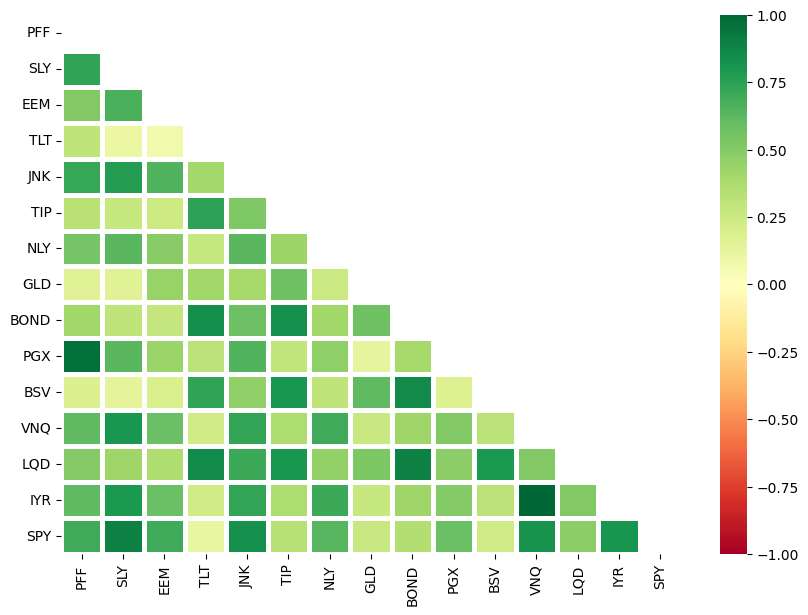

In [6]:
TRADING_DAYS_PER_YEAR, _, _ = pf.get_trading_days()
corr_df = portfolio.correlation_map(ts, method='log', days=TRADING_DAYS_PER_YEAR)
corr_df